# Data Scoring
I'll generate a dummy data with linear relation formed of 1 independent variable and other dependant variable

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.randn(100, 1)

In [3]:
x[:10]

array([[1.86750711],
       [1.82443773],
       [1.9632382 ],
       [0.07162541],
       [0.79649507],
       [0.73410792],
       [0.85285251],
       [0.22575351],
       [1.72894122],
       [1.36444381]])

In [4]:
x.shape,y.shape 

((100, 1), (100, 1))

# Data Visualization
let we visualize this data

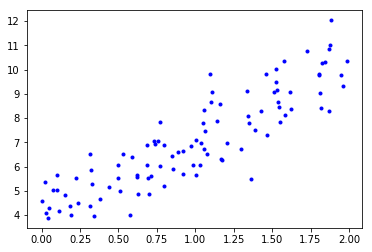

In [5]:
plt.plot(x, y, "b.")
plt.show()

## There are two ways to implement the Linear Regression
- Normal Equation
- Gradient Descent

# 1- Normal Equation

As we know, the line equation is: y = m x + b  where:
- m : Slope of the line
- x : the independent variable
- b : the intercept between the line and dependent variable axis (sometimes called y)

We will use this equation to generate a line across the points in the graph, in which be in the average of this point (not completly true) to minimize the total error or regression
- is there an error?
- Of course yes, but we try to minimize it as possible

to use this equation, we have to know the m and b to be able to predict the value of y given the value of x.
So, how can we estimate it?

let's form a linear algebra expression from this equation: 
- y = m x + b  to be 
- y = theta0 + theta1 x
<img src="../../Assets/img/lr1.png" >
<img src="">
- as per linear algebra, we can write the following formula to represent the previous one
<img src="">
<img src="../../Assets/img/lr2.png" >
- we noticed that the theta vector has two values, and the X vector has 1 column only. it will cause a problem in dot product. but by go back through the line equation (y = theta0 + theta1 * X) we can get that value of X multiplied by theta0 is 1. So we can write theta vector as [theta0 , theta1] and X as [1 , X].
- if the X vector has more than row, we have to add column contains 1 to keep the equation true and to avoid the dot product problem due to length.

where:
- theta ^ T : the vector contains all coefficients of the equation (m , b) or (theta1,theta0)
- X         : the vector or matrix contain the values of independent variable , and we will take an example to clarify what it represent.
---
now, we have an equation , but we missed theta vector.
So, we have to find it.
- at training phase, we know X & y 
- what is the value of theta vector??
---
we need to form a relation between the well known parts of equation to find the unkown part, we need to get theta vector in a side alone.


<b>to get theta alone</b> we have to remove X from this side, but it multiplied with it!. how can we devide by X in linear algebra?

---
sure, we have to multiply with the inverse of X, but the inverse require the matrix to be square, what we can do?

--- 
we can multiply with the transpose of X to be :

<img src="../../Assets/img/lr3.png" >
<img src="">
- to keep theta^T alone, we will multiply by (X^T . X)^-1 which called the inverse to be
<img src="">
<img src="../../Assets/img/lr4.png" >
<img src="">

- the final result will be 
<img src="">
<img src="../../Assets/img/lr5.png" >
<img src="">
- we can write it as:

<img src="">
<img src="../../Assets/img/lr6.png" >
<img src=""> 
- as the theta vector is 1d values, we can remove the T sign to be:
<img src="">
<img src="../../Assets/img/lr7.png" >
<img src=""> 
- let we write a code to solve this equation:

#### 1- Add column with 1 values
it have to be in the same number of rows of the original vector.
So, how can i get the shape of the matrix or vector?

In [6]:
x.shape

(100, 1)

in this case, the X contain a one column with 100 row, another case X can be more than column and rows.
How can we get number of rows only?

In [7]:
rows_num = x.shape[0]
rows_num

100

we need to generate the column with the shape of (rows,1).
there are many wethods to make it.
- using .ones function in numpy
- using .full function in numpy

In [8]:
np.full((rows_num,1),1)
ones = np.ones((rows_num,1)) 

we generate the ones column, now we have to add it to the original X vector

In [9]:
X_ = np.hstack((ones,x))

#### 2- build model equation

now we are ready to implement our model equation .

In [10]:
theta =  np.linalg.inv(X_.T.dot(X_)).dot(X_.T).dot(y) # np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta

array([[4.05237919],
       [3.05259439]])

Now, 
- we have the theta vector, but I can't understand this values.
- easly, find the order of your columns in X vector, and get the opposite in theta vector.
- Ex. : we added the ones column to be the first column in X_ and it is opposite to theta0. So, the theta0 value will be the first value in theta vector (6.91948246) and the second column in X_ was the x values which opposite to theta1 value.

In [11]:
b = theta[0][0]
m = theta[1][0]
m,b

(3.05259438619516, 4.052379188895197)

#### 3- Prediction

by estimate the value of m & b, we can predict any value of y given any value of x
we can use two methods:
- using ordinary equation
- using linear algebra dot product

In [12]:
def predict(x):
    y = m*x + b
    return y
    

In [13]:
def predict(x):
    x = np.array([1,x])
    y = x.dot(theta)
    return y[0]

In [14]:
predict(150)

461.9415371181692

#### 4- Visualize the best fit line

In [15]:
def la_predict(x):
    y = x.dot(theta)
    return y

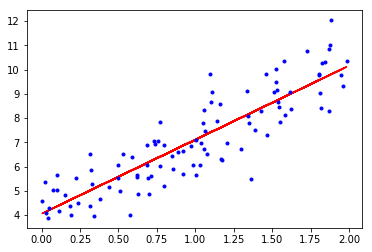

In [16]:
plt.plot(x, la_predict(X_), "r-")
plt.plot(x, y, "b.")
plt.show()

### Disadventages of Normal equation 
normal equation is slower when the number of features n goes up. In practice, when n exceeds 10,000 features, you can improve the computational efficiency by choosing an iterative algorithm such as gradient descent over the normal equation.
The problem with this operation is the time complexity of calculating the inverse of a nxn matrix which is O(n^3) and as n increases it can take a very long time to finish.

# 2- Gradient Descent
--------------
To explain in brief about gradient descent, imagine that you are on a mountain and are blindfolded and your task is to come down from the mountain to the flat land without assistance. The only assistance you have is a gadget which tells you the height from sea-level. What would be your approach be. You would start to descend in some random direction and then ask the gadget what is the height now. If the gadget tells you that height and it is more than the initial height then you know you started in wrong direction. You change the direction and repeat the process. This way in many iterations finally you successfully descend down.

-------------
Well here is the analogy with machine learning terms now:
- Size of Steps took in any direction = Learning rate
- Gadget tells you height = Cost function
- The direction of your steps = Gradients

-----------------
<img src="../../Assets/img/gd.png">

------------------
<img src="../../Assets/img/gd_1.png">
where alpha = Learning Rate

<a href="https://towardsdatascience.com/gradient-descent-in-python-a0d07285742f">source Here</a>

### Cost Function 

In [17]:
def cal_cost(theta,x,y):
    m = len(y)
    predictions = x.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions - y))
    return cost

### Gradient Descent Function 

In [18]:
def gradient_descent(X,y,theta,learning_rate=0.01,iterations = 1000):
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history= np.zeros((iterations,2))
    for i in range(iterations):
        prediction = np.dot(X,theta)
        theta = theta - (1/m)*learning_rate * (X.T.dot((prediction - y)))
        theta_history[i,:] = theta.T
        cost_history[i] = cal_cost(theta,X,y)
        plt.plot(X[:,1].reshape(-1,1),theta.T.dot(X.T).T,'r',zorder=1)
    plt.scatter(X[:,1].reshape(-1,1),y,zorder=2)
    plt.show()
    return theta,cost_history,theta_history

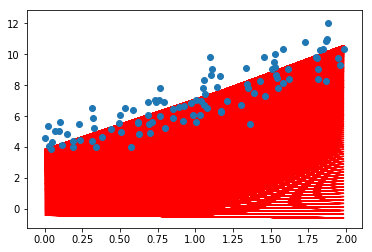

Theta:  [[3.83031616]
 [3.24433526]]


In [19]:
theta = np.random.randn(2,1)
theta,cost_history,theta_history  = gradient_descent(X_,y,theta)
print("Theta: ",theta)

### Visualize the cost function value over iterations

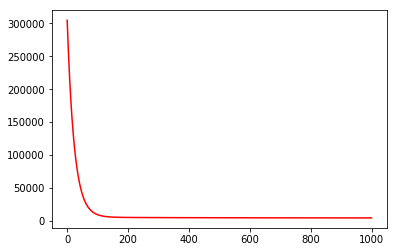

In [20]:
plt.plot(range(1000),cost_history,'r')

### Visualize the value of the theta over iterations

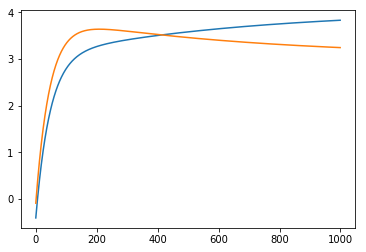

In [21]:
plt.plot(range(1000),theta_history)